In [160]:
import ares
import matplotlib.pyplot as plt
import numpy as np
import time

In [164]:
pf = \
    {
    'radiative_transfer':False,
    'verbose':False,
    'dark_matter_heating':True, 
    'include_cgm':False, 
    # 'initial_v_stream':0, 
    'initial_redshift':1010, 
    'include_He':True
    }

V_rms = 29000 # m/s

N = 20 # number of initial_v_stream
N_z = 100

initial_v_stream_list = np.random.normal(0, V_rms, N)
initial_v_stream_list = abs(initial_v_stream_list)
sim_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

z_array = np.linspace(6, 300, N_z)
dTb_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

In [165]:
start_time = time.time()

for i, initial_v_stream in enumerate(initial_v_stream_list):
    print("initial_v_stream =", initial_v_stream, 'm/s')
    sim_dict[initial_v_stream] = ares.simulations.Global21cm(initial_v_stream = initial_v_stream, **pf)
    sim = sim_dict[initial_v_stream]
    sim.run()
    
    dTb_dict[initial_v_stream] = np.interp(z_array, sim.history['z'][::-1], sim.history['dTb'][::-1])
    # sim_dict[initial_v_stream].save()

end_time = time.time()
time_elapse = end_time - start_time
print("It costs {} seconds to average {} different initial_v_stream.".format(time_elapse, N))

initial_v_stream = 38788.26140105371 m/s
initial_v_stream = 52160.09239265051 m/s
initial_v_stream = 15508.841670243446 m/s
initial_v_stream = 14491.566847896149 m/s
initial_v_stream = 12335.114370919177 m/s
initial_v_stream = 4845.044945977595 m/s
initial_v_stream = 45754.52665635285 m/s
initial_v_stream = 6723.034032965803 m/s
initial_v_stream = 16125.718674364944 m/s
initial_v_stream = 23093.503966864308 m/s
initial_v_stream = 958.8594187367621 m/s
initial_v_stream = 20521.470530209648 m/s
initial_v_stream = 650.4907119752752 m/s
initial_v_stream = 770.8471494071138 m/s
initial_v_stream = 18680.955053317848 m/s
initial_v_stream = 40884.19387937617 m/s
initial_v_stream = 29568.773642232445 m/s
initial_v_stream = 3038.610126180618 m/s
initial_v_stream = 15151.18341329566 m/s
initial_v_stream = 35386.567685298614 m/s
It costs 82.91708946228027 seconds to average 20 different initial_v_stream.


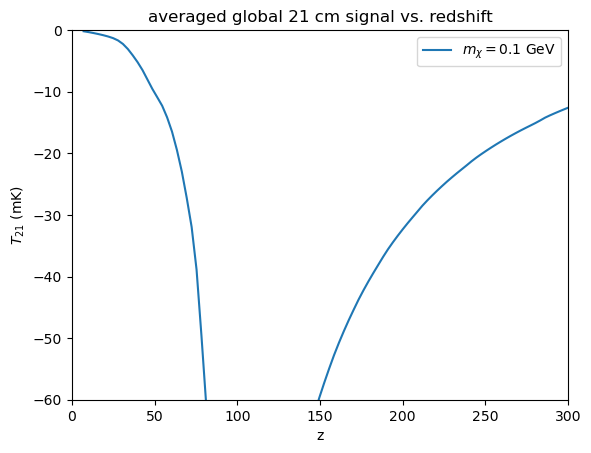

In [166]:
dTb_average = np.average(list(dTb_dict.values()), axis=0)

plt.plot(1+z_array, dTb_average, label=r'$m_{\chi} = 0.1$ GeV')#, label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))
plt.title("averaged global 21 cm signal vs. redshift")
plt.xlabel("z")
plt.ylabel(r"$T_{21}$ (mK)")
plt.xlim(0, 300)
plt.ylim(-60, 0)
plt.legend()
plt.show()

In [ ]:
# for initial_v_stream in initial_v_stream_list:
#     sim = sim_dict[initial_v_stream]
#     plt.plot(1+sim.history['z'], sim.history['dTb'], label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))
# plt.title("global 21 cm signal vs. redshift")
# plt.xlabel("z")
# plt.ylabel(r"$T_{21}$ (mK)")
# plt.xlim(0, 300)
# plt.ylim(-60, 0)
# plt.legend()
# plt.show()